<a href="https://colab.research.google.com/github/Megh-Zyke/Basic_MLprojects/blob/main/Prostate_Cancer_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Prostate_Cancer.csv to Prostate_Cancer.csv


In [4]:
df = pd.read_csv("Prostate_Cancer.csv")

In [5]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [6]:
df.drop('id',axis = 1,inplace = True) 

In [7]:
df['result'] = df['diagnosis_result']
df.drop('diagnosis_result',axis = 1,inplace = True)

In [8]:
df.corr()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
radius,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


Analysing the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


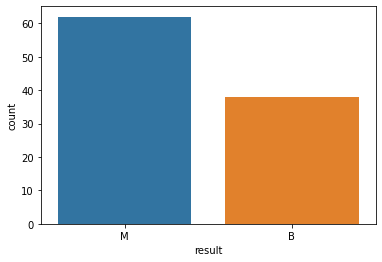

In [9]:
sns.countplot(df.result)

In [10]:
def plot(x):
  plt.scatter(df[col[x]],df[col[x+1]],c = df.result)

In [11]:
col = df.columns

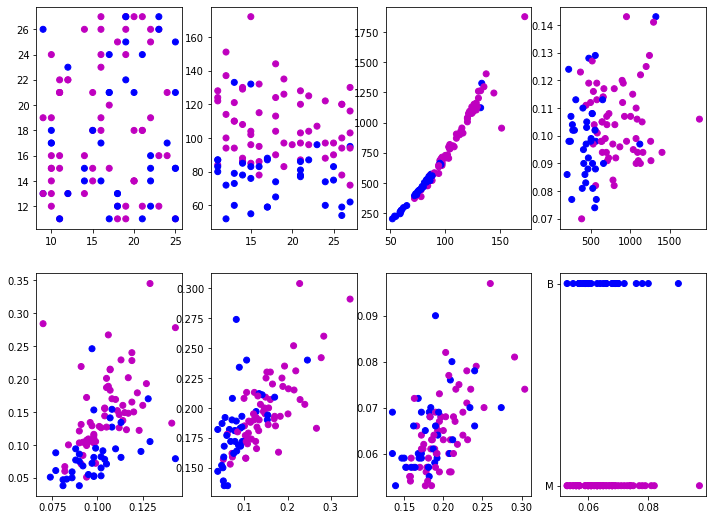

In [13]:
plt.figure(figsize=(12,9))
for i in range(len(col)-1):
  plt.subplot(2,4,i+1)
  plot(i)


In [ ]:
from sklearn.linear_model import LogisticRegression
df['result'] = df['result'].replace({'M':0,'B':1})

In [ ]:
feature_variables = df.drop(columns = 'result')
target_variables = df.result

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature_variables,target_variables ,test_size = 0.25 ,random_state = 28)

In [ ]:
model = LogisticRegression().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
model.score(x_test,y_test)

0.96

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
tpr,fpr,thres = roc_curve(model.predict(x_test),y_test)

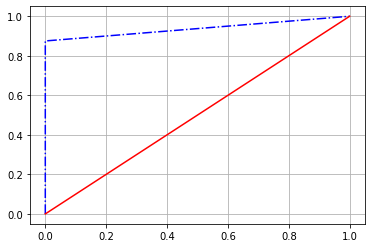

In [ ]:
plt.plot(tpr,fpr,'b-.' ,[1,0],[1,0],'r')
plt.grid()